In [1]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
df=pd.read_csv('teachingratings.csv')

In [3]:
df.columns

Index(['minority', 'age', 'gender', 'credits', 'beauty', 'eval', 'division',
       'native', 'tenure', 'students', 'allstudents', 'prof', 'PrimaryLast',
       'vismin', 'female', 'single_credit', 'upper_division',
       'English_speaker', 'tenured_prof'],
      dtype='object')

# Non Parametric Test

## Wilcoxon Signed-Rank Test
The Wilcoxon Signed-Rank Test is the non-parametric version of the paired samples t-test.

In [5]:
from scipy.stats import wilcoxon
wilcoxon(df['beauty'], df['eval'])

WilcoxonResult(statistic=0.0, pvalue=1.3939382012458973e-77)

## Mann-Whitney U test
A Mann-Whitney U test is used to compare the differences between two samples when the sample distributions are not normally distributed and the sample sizes are small (n <30). For more info click [Here](https://www.statology.org/mann-whitney-u-test-python/)

In [10]:
from scipy.stats import mannwhitneyu
mannwhitneyu(df['beauty'], df['eval'])

MannwhitneyuResult(statistic=0.0, pvalue=5.939468011063576e-153)

In [15]:
mannwhitneyu(df['beauty'], df['eval'], alternative='less')

MannwhitneyuResult(statistic=0.0, pvalue=2.969734005531788e-153)

In [4]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal
#seed(0)

data1=randn(100) # data is taken from normal distributation 
data3=randn(100)
data2= lognormal(4,3,500) #data is taken from lognormal distributation

In [17]:
from scipy.stats import ks_2samp
ks_2samp(data1, data3)

KstestResult(statistic=0.23, pvalue=0.009878183186176536)

c:\Users\haier\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

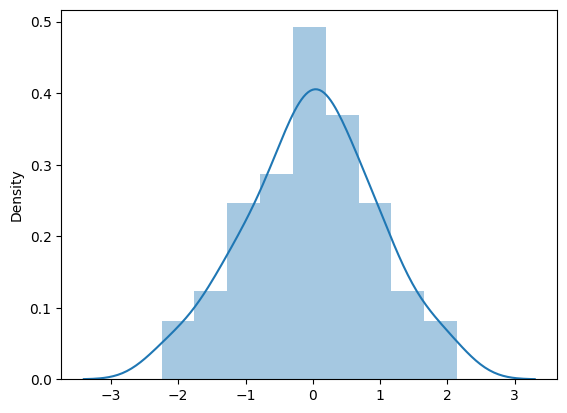

In [15]:
sns.distplot(data1)

(array([491.,   5.,   2.,   0.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([1.08888402e-03, 2.85896117e+04, 5.71792224e+04, 8.57688330e+04,
        1.14358444e+05, 1.42948054e+05, 1.71537665e+05, 2.00127276e+05,
        2.28716886e+05, 2.57306497e+05, 2.85896107e+05]),
 <BarContainer object of 10 artists>)

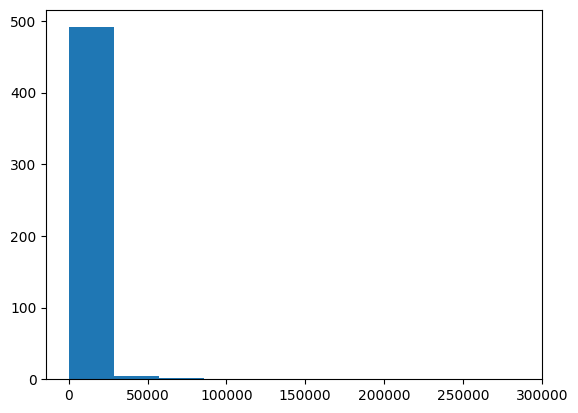

In [18]:
plt.hist(data2)

## Confidence Interval

In [12]:
import scipy.stats as st
st.norm.interval(alpha=0.99, loc=np.median(df['age']), scale=st.sem(df['age']))

C:\Users\haier\AppData\Local\Temp\ipykernel_7136\2603273328.py:2: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.norm.interval(alpha=0.99, loc=np.median(df['age']), scale=st.sem(df['age']))


(46.82652414467112, 49.17347585532888)

In [13]:
st.norm.interval(alpha=0.99, loc=np.mean(df['age']), scale=st.sem(df['age']))

C:\Users\haier\AppData\Local\Temp\ipykernel_7136\558732558.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.norm.interval(alpha=0.99, loc=np.mean(df['age']), scale=st.sem(df['age']))


(47.191534943807184, 49.53848665446495)

c:\Users\haier\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='eval'>

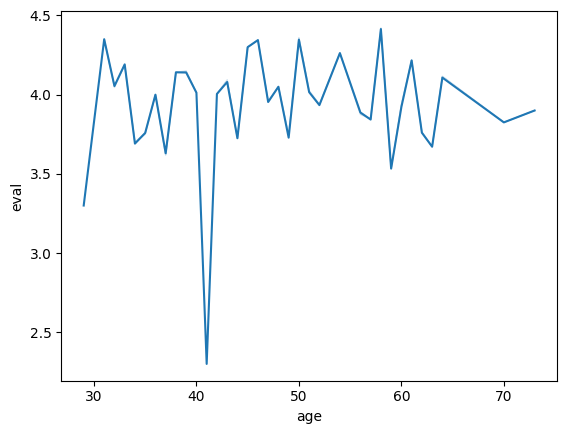

In [18]:
# plot 95% confidence interval
sns.lineplot(df['age'], df['eval'], ci=.95)

<AxesSubplot:xlabel='age', ylabel='eval'>

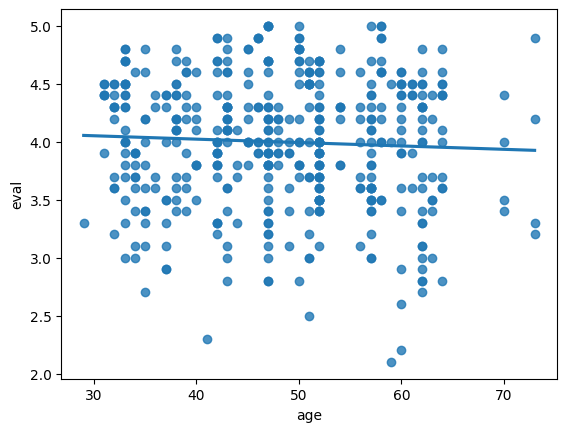

In [24]:
sns.regplot(df['age'], df['eval'], ci=.95)

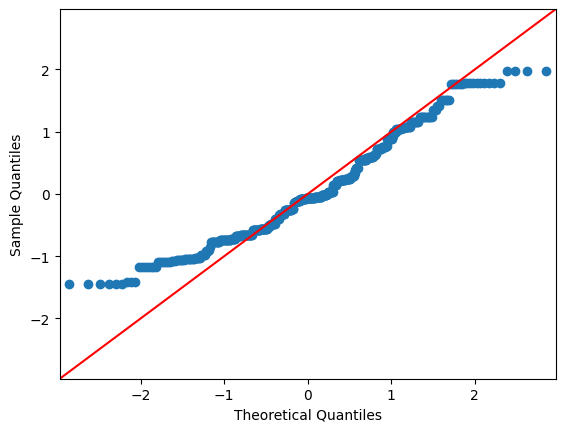

In [37]:
import statsmodels.api as sm
sm.qqplot(df['beauty'], line='45')    # 45 degree line
plt.show()

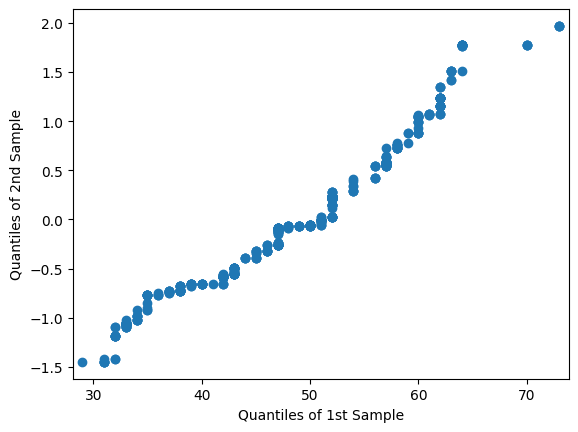

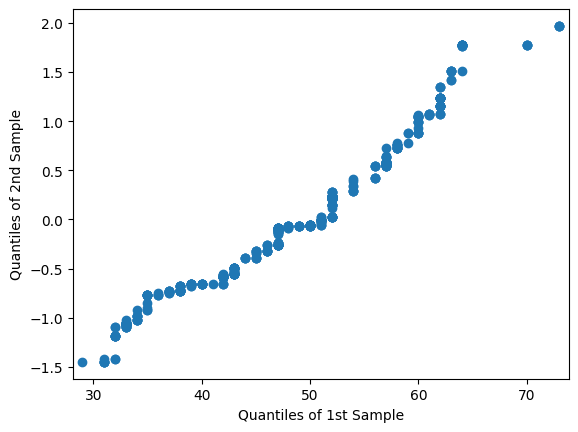

In [39]:
sm.qqplot_2samples(df['age'], df['beauty'])